In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [5]:
DATA_STORE = 'C:/Users/86155/Machine Learning for Algorithmic Trading/data/assets.h5'

In [6]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['quandl/wiki/prices']
            .loc[idx['2007':'2010', 'AAPL'],
                 ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']]
            .unstack('ticker')
            .swaplevel(axis=1)
            .loc[:, 'AAPL']
            .rename(columns=lambda x: x.replace('adj_', '')))

In [7]:
data

,open,high,low,close,volume
date,,,,,
2007-01-03,11.089468,11.126737,10.525291,10.769468,309579900.0
2007-01-04,10.801596,11.045773,10.772038,11.008504,211815100.0
2007-01-05,11.022640,11.077901,10.846576,10.930110,208685400.0
2007-01-08,11.047058,11.120311,10.959669,10.984086,199276700.0
2007-01-09,11.110030,11.949226,10.942962,11.896535,837324600.0
...,...,...,...,...,...
2010-12-27,41.490969,41.823576,41.319801,41.725905,62454000.0
2010-12-28,41.884003,41.980363,41.774741,41.827431,43981000.0
2010-12-29,41.923817,41.953375,41.779881,41.804299,40784800.0


In [8]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

In [9]:
rsi = RSI(data.close, timeperiod=14)

In [10]:
macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)

In [11]:
macd_data = pd.DataFrame({'AAPL': data.close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

In [12]:
macd_data

,AAPL,MACD,MACD Signal,MACD History
date,,,,
2007-01-03,10.769468,NaN,NaN,NaN
2007-01-04,11.008504,NaN,NaN,NaN
2007-01-05,10.930110,NaN,NaN,NaN
2007-01-08,10.984086,NaN,NaN,NaN
2007-01-09,11.896535,NaN,NaN,NaN
...,...,...,...,...
2010-12-27,41.725905,0.453737,0.455098,-0.001361
2010-12-28,41.827431,0.455469,0.455172,0.000297
2010-12-29,41.804299,0.449790,0.454096,-0.004305


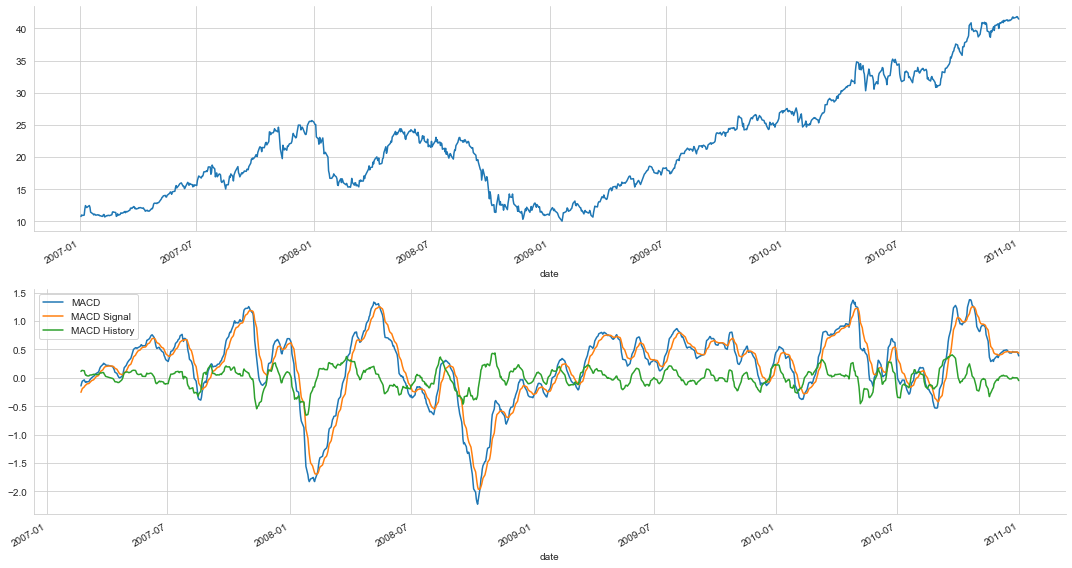

In [17]:
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop('AAPL', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

In [18]:
data = pd.DataFrame({'AAPL': data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

In [19]:
data

,AAPL,BB Up,BB Mid,BB down,RSI,MACD
date,,,,,,
2007-01-03,10.769468,NaN,NaN,NaN,NaN,NaN
2007-01-04,11.008504,NaN,NaN,NaN,NaN,NaN
2007-01-05,10.930110,NaN,NaN,NaN,NaN,NaN
2007-01-08,10.984086,NaN,NaN,NaN,NaN,NaN
2007-01-09,11.896535,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2010-12-27,41.725905,41.966562,41.116703,40.266845,62.519607,0.453737
2010-12-28,41.827431,42.032419,41.180777,40.329135,63.634022,0.455469
2010-12-29,41.804299,42.097564,41.232305,40.367046,63.173124,0.449790


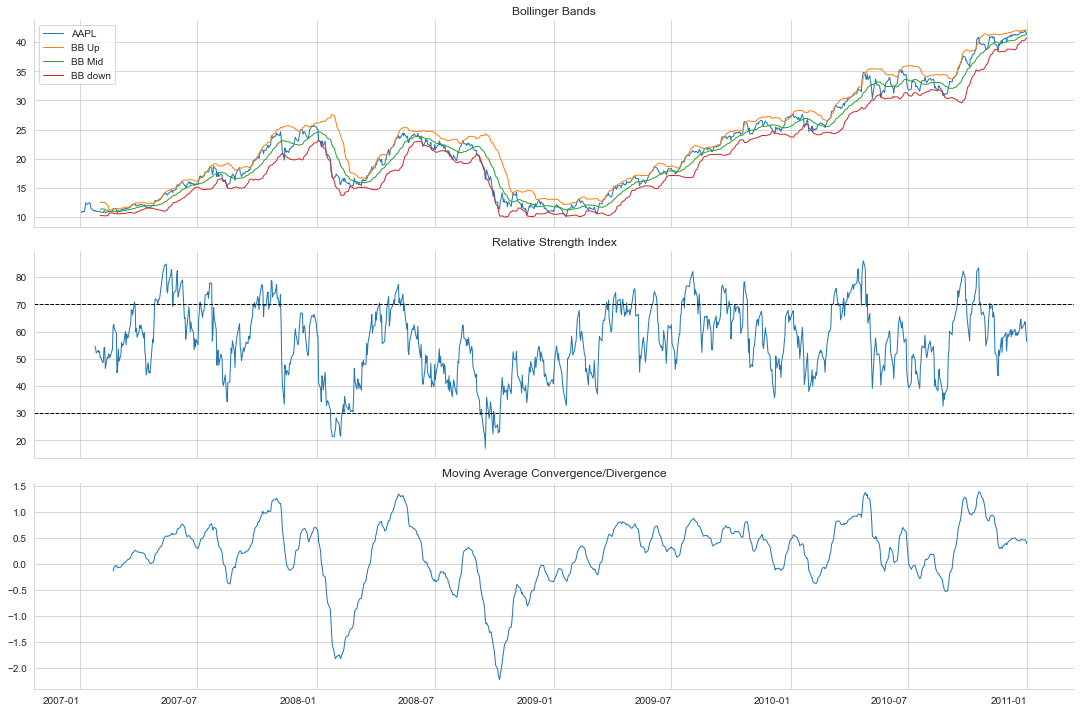

In [20]:

fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();